In [51]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
c= os.getcwd()


In [83]:
# https://data.cityofnewyork.us/Education/2014-2015-School-Budget-Overview/ven4-h25u
budget_df = pd.read_csv(os.getcwd() + '/school_budget_2014.csv')
demographic_df = pd.read_csv(os.getcwd() + '/2013_-_2018_Demographic_Snapshot_School.csv')
performance_df = pd.read_csv(os.getcwd() + '/school_performance_2014.csv')

In [16]:
budget_df.columns.values

array(['Fiscal_Year', 'Location', 'S1: Label a: FY14 Revised Base ',
       'S1: Label b: FSF & TL 09 C4E CTT ',
       'S1: Label c: FSF Over Formula', 'S2: Label d: FSF Preliminary',
       'S2: Label a: FY14 Revised Base', 'S2: Label f: Register Change',
       'S2: Label g: Teacher Salary Growth',
       'S2: Label h: New School Foundation',
       'S3: Label i: FY14 FSF at 100%', 'S3: Foundation  ',
       'S3: Label d - Foundation', 'S3: Label i - Foundation',
       'S3: Label j: FSF Final%', 'S4: Label d: FY14 FSF Initial',
       'S4: AC Name: FSF (HS)', 'S4: AC Name: TL09 C4E CTT (HS)',
       'S4: AC Name: Funds Over Formula',
       'S5: TL SE Transitional Funding', 'As_Of_Date'], dtype=object)

In [84]:
demographic_df.columns.values

array(['DBN', 'School Name', 'Year', 'Total Enrollment',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female',
       '% Female', '# Male', '% Male', '# Asian', '% Asian', '# Black',
       '% Black', '# Hispanic', '% Hispanic',
       '# Multiple Race Categories Not Represented',
       '% Multiple Race Categories Not Represented', '# White', '% White',
       '# Students with Disabilities', '% Students with Disabilities',
       '# English Language Learners', '% English Language Learners',
       '# Poverty', '% Poverty', 'Economic Need Index'], dtype=object)

In [17]:
performance_df.columns.values

array(['dbn', 'ontrack_year1_2013', 'graduation_rate_2013',
       'college_career_rate_2013', 'student_satisfaction_2013',
       'ontrack_year1_2012', 'graduation_rate_2012',
       'college_career_rate_2012', 'student_satisfaction_2012',
       'ontrack_year1_historic_avg_similar_schls',
       'graduation_rate_historic_avg_similar_schls',
       'college_career_rate_historic_avg_similar_schls',
       'student_satisfaction_historic_avg_similar_schls',
       'quality_review_rating', 'quality_review_year'], dtype=object)

In [109]:
# select only 2014 - 15 demographic data
demographic_df = demographic_df.loc[demographic_df['Year'] == '2014-15']

In [110]:
performance_df = pd.merge(performance_df, demographic_df, left_on='dbn', right_on='DBN', how='inner')

In [111]:
# remove district code '01M001 -> M001'
performance_df['dbn'] = performance_df['dbn'].apply(lambda line: line[2:])

In [112]:
df = pd.merge(performance_df, budget_df, left_on='dbn', right_on='Location', how='inner')

In [113]:
df = df.dropna()
df['graduation_rate_2013'] = df['graduation_rate_2013'].str.rstrip('%').astype('float') / 100.0
df['ontrack_year1_2013'] = df['ontrack_year1_2013'].str.rstrip('%').astype('float') / 100.0
df['Economic Need Index'] =  df['Economic Need Index'].str.rstrip('%').astype('float') / 100.0


In [198]:
df['graduation_rate_historic_avg_similar_schls'] =  df['graduation_rate_historic_avg_similar_schls'].str.rstrip('%').astype('float') / 100.0
df['college_career_rate_historic_avg_similar_schls'] =  df['college_career_rate_historic_avg_similar_schls'].str.rstrip('%').astype('float') / 100.0
   

In [126]:
df.columns.values

array(['dbn', 'ontrack_year1_2013', 'graduation_rate_2013',
       'college_career_rate_2013', 'student_satisfaction_2013',
       'ontrack_year1_2012', 'graduation_rate_2012',
       'college_career_rate_2012', 'student_satisfaction_2012',
       'ontrack_year1_historic_avg_similar_schls',
       'graduation_rate_historic_avg_similar_schls',
       'college_career_rate_historic_avg_similar_schls',
       'student_satisfaction_historic_avg_similar_schls',
       'quality_review_rating', 'quality_review_year', 'DBN',
       'School Name', 'Year', 'Total Enrollment',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female',
       '% Female', '# Male', '% Male', '# Asian', '% Asian', '# Black',
       '% Black', '# Hispanic', '% Hispanic',
       '# Multiple Race Categories Not Represented',
       '% Multiple Race Categories Not Repre

In [129]:
df['Spending per student'] = df['S2: Label d: FSF Preliminary']/df['Total Enrollment']

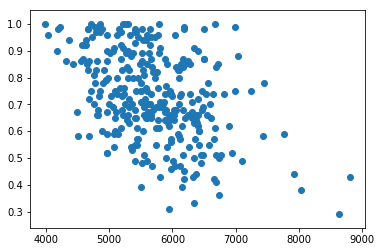

In [133]:
plt.scatter(df['Spending per student'], df['graduation_rate_2013'])
# plt.scatter( df['graduation_rate_2013'], df['Spending per student'])

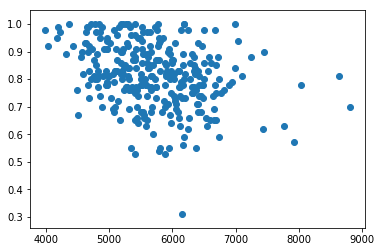

In [131]:

plt.scatter( df['Spending per student'],df['ontrack_year1_2013'])

In [170]:
df.nlargest(10, 'Spending per student')[['School Name',
                                          'graduation_rate_2013',
                                          'Spending per student',
                                          'Total Enrollment',
                                         '% English Language Learners',
                                        '% Students with Disabilities',
                                         'Economic Need Index']]

,School Name,graduation_rate_2013,Spending per student,Total Enrollment,% English Language Learners,% Students with Disabilities,Economic Need Index
153,Bronx High School of Business,0.43,8798.872507,339,29.8,26.3,85.4%
294,Multicultural High School,0.29,8624.660306,229,90.0,2.2,96.4%
176,Fordham Leadership Academy,0.38,8037.906187,438,16.7,28.8,85.4%
70,Wadleigh Secondary School for the Performing &...,0.44,7912.941506,445,4.9,22.5,77.3%
89,Academy for Social Action,0.59,7767.864017,234,17.9,27.4,81.4%
243,El Puente Academy for Peace and Justice,0.78,7439.981184,245,15.5,24.5,77.7%
0,Orchard Collegiate Academy,0.58,7426.995412,255,11.8,32.5,83.9%
245,Digital Arts and Cinema Technology High School,0.75,7236.969120,250,7.2,34.4,75.6%
233,The Williamsburg High School of Art and Techno...,0.49,7105.459891,276,25.4,22.1,82.2%
154,Bronx High School for Medical Science,0.88,7033.662436,472,3.0,12.1,79.7%


In [165]:
df.nsmallest(10, 'Spending per student')[['School Name',
                                          'graduation_rate_2013',
                                          'Spending per student',
                                          'Total Enrollment',
                                          '% English Language Learners',
                                         '% Students with Disabilities',
                                         'Economic Need Index']]

,School Name,graduation_rate_2013,Spending per student,Total Enrollment,% English Language Learners,% Students with Disabilities,Economic Need Index
364,Scholars' Academy,1.00,3992.020553,1302,0.0,2.3,40.0%
273,Medgar Evers College Preparatory School,0.96,4028.230480,1271,0.5,3.5,46.0%
81,Manhattan Center for Science and Mathematics,0.90,4182.119732,1603,3.4,6.6,68.1%
4,"New Explorations into Science, Technology and ...",0.98,4188.640928,1735,0.1,3.8,25.7%
72,Beacon High School,0.99,4229.736086,1285,0.1,5.8,27.7%
359,Channel View School for Research,0.86,4312.401640,683,1.5,14.2,52.9%
26,Institute for Collaborative Education,0.94,4369.612780,482,0.0,7.3,26.4%
318,Midwood High School,0.85,4426.484890,3787,3.3,6.7,52.1%
310,Abraham Lincoln High School,0.67,4485.686894,2341,13.4,15.4,69.9%
196,Harry S Truman High School,0.58,4512.307930,2058,4.8,18.3,67.1%


In [154]:
df[df['dbn'] == 'M692']

,dbn,ontrack_year1_2013,graduation_rate_2013,college_career_rate_2013,student_satisfaction_2013,ontrack_year1_2012,graduation_rate_2012,college_career_rate_2012,student_satisfaction_2012,ontrack_year1_historic_avg_similar_schls,...,S3: Label d - Foundation,S3: Label i - Foundation,S3: Label j: FSF Final%,S4: Label d: FY14 FSF Initial,S4: AC Name: FSF (HS),S4: AC Name: TL09 C4E CTT (HS),S4: AC Name: Funds Over Formula,S5: TL SE Transitional Funding,As_Of_Date,Spending per student
93,M692,1.0,0.99,98%,8.2,97%,99%,60%,7.6,97%,...,3061064.99,2470466.3,1.2391,3286065.0,2695465.0,0.0,590600.0,0.0,05/29/2014,6991.627638


(array([ 1.,  0.,  0.,  1.,  3.,  7., 12., 16., 26., 29., 63., 52., 32.,
        34., 38.]),
 array([0.31 , 0.356, 0.402, 0.448, 0.494, 0.54 , 0.586, 0.632, 0.678,
        0.724, 0.77 , 0.816, 0.862, 0.908, 0.954, 1.   ]),
 <a list of 15 Patch objects>)

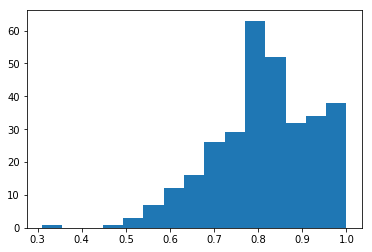

In [78]:
plt.hist(df['ontrack_year1_2013'].values, bins='auto')

(array([ 4.,  9., 16., 26., 32., 61., 41., 36., 36., 44.]),
 array([0.29 , 0.361, 0.432, 0.503, 0.574, 0.645, 0.716, 0.787, 0.858,
        0.929, 1.   ]),
 <a list of 10 Patch objects>)

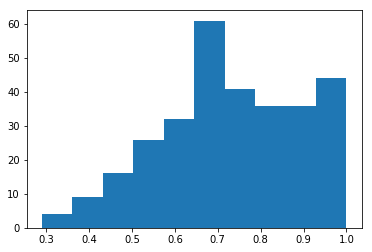

In [177]:
plt.hist(df['graduation_rate_2013'].values, bins='auto')


(array([ 7., 11.,  7.,  8., 17., 17., 18., 42., 44., 52., 52., 18., 12.]),
 array([0.21 , 0.268, 0.326, 0.384, 0.442, 0.5  , 0.558, 0.616, 0.674,
        0.732, 0.79 , 0.848, 0.906, 0.964]),
 <a list of 13 Patch objects>)

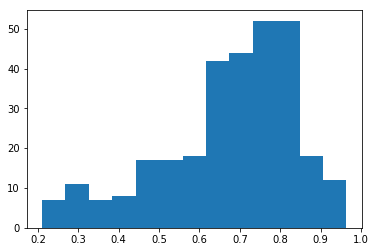

In [173]:
plt.hist(df['Economic Need Index'].values, bins='auto')

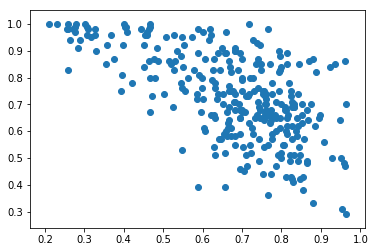

In [176]:
plt.scatter(df['Economic Need Index'],df['graduation_rate_2013'])

In [181]:
df['Economic Need Index'].plot.box

AttributeError: 'function' object has no attribute 'show'

In [182]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3caf2050>,
      dtype=object)

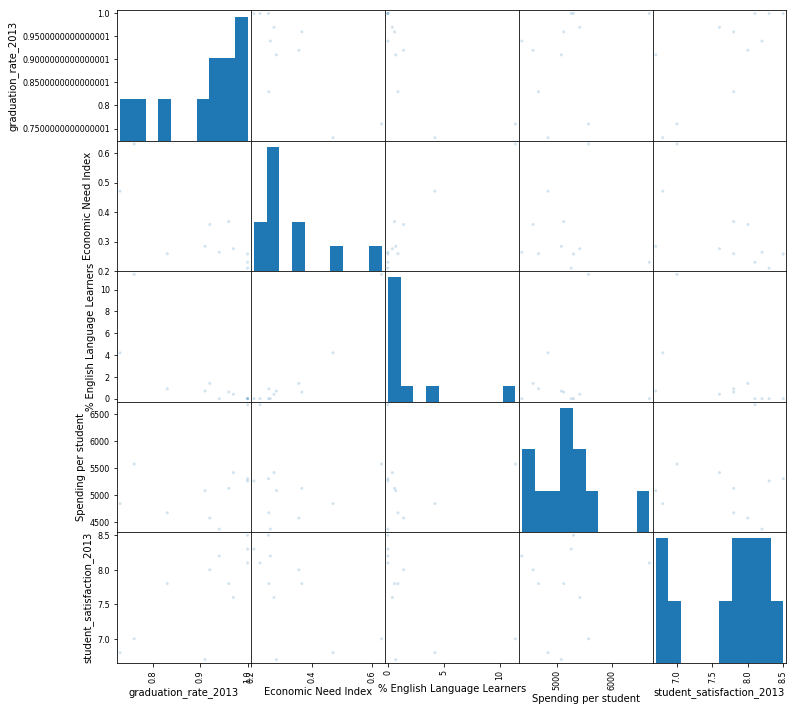

In [211]:
scatter_matrix(df[df['% White'] > 50][['graduation_rate_2013',
                   'Economic Need Index',
                   '% English Language Learners',
                   'Spending per student',
                   'student_satisfaction_2013'
                  ]], alpha=0.2, figsize=(12, 12))

0      0.42
1      0.41
2      0.65
3      0.39
4      0.87
5      0.89
11     0.54
12     0.54
13     0.48
14     0.63
15     0.49
16     0.43
17     0.54
18     0.53
19     0.52
20     0.54
25     0.67
26     0.66
27     0.79
28     0.84
29     0.76
30     0.73
31     0.80
32     0.87
33     0.83
34     0.45
35     0.67
37     0.45
42     0.70
43     0.51
       ... 
385    0.66
387    0.46
388    0.49
389    0.49
390    0.60
391    0.49
395    0.48
396    0.50
400    0.49
401    0.48
402    0.86
403    0.59
404    0.44
405    0.73
406    0.88
407    0.68
409    0.65
410    0.53
411    0.44
412    0.49
413    0.69
414    0.59
415    0.42
416    0.90
418    0.37
419    0.48
420    0.43
421    0.31
422    0.68
423    0.43
Name: college_career_rate_historic_avg_similar_schls, Length: 305, dtype: float64